In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Load the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

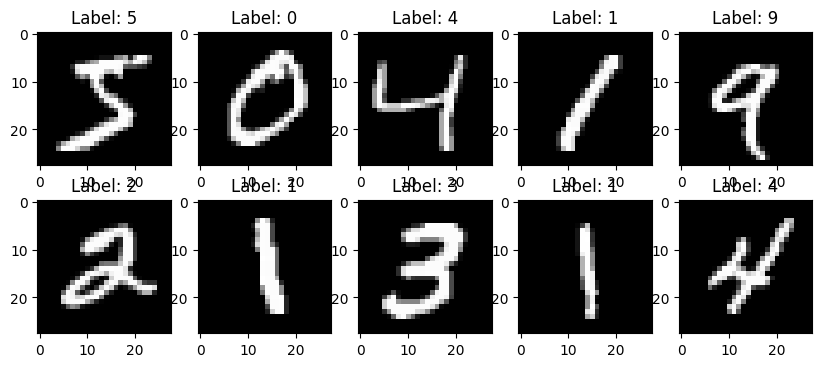

In [3]:
# Visualize the sample data
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
plt.show()

In [4]:
# Preprocess the data
# Reshape and Normalize the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
# One-hot encoding 
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [6]:
# Build a neural network model
# Define the model architechture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 63s 65ms/step - loss: 0.1698 - accuracy: 0.9487 - val_loss: 0.0549 - val_accuracy: 0.9823
Epoch 2/10
938/938 [==============================] - 60s 64ms/step - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.0411 - val_accuracy: 0.9859
Epoch 3/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0412 - val_accuracy: 0.9862
Epoch 4/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 5/10
938/938 [==============================] - 63s 67ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 0.0270 - val_accuracy: 0.9919
Epoch 6/10
938/938 [==============================] - 62s 66ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0291 - val_accuracy: 0.9914
Epoch 7/10
938/938 [==============================] - 63s 67ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0265 - val_accuracy:

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0272 - accuracy: 0.9922
Test accuracy: 0.9922000169754028


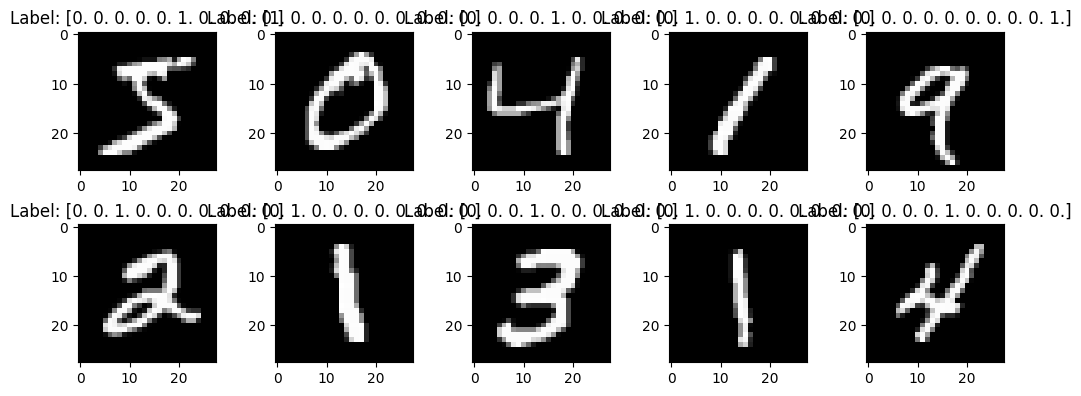

In [10]:
import matplotlib.pyplot as plt

# Display sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
plt.tight_layout()
plt.show()

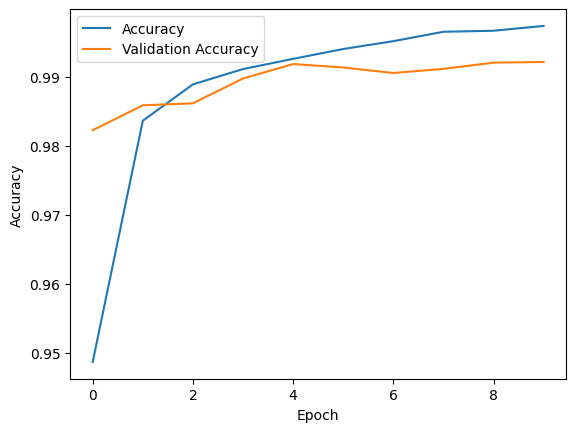

In [11]:
# Training history visualization
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 3s 10ms/step


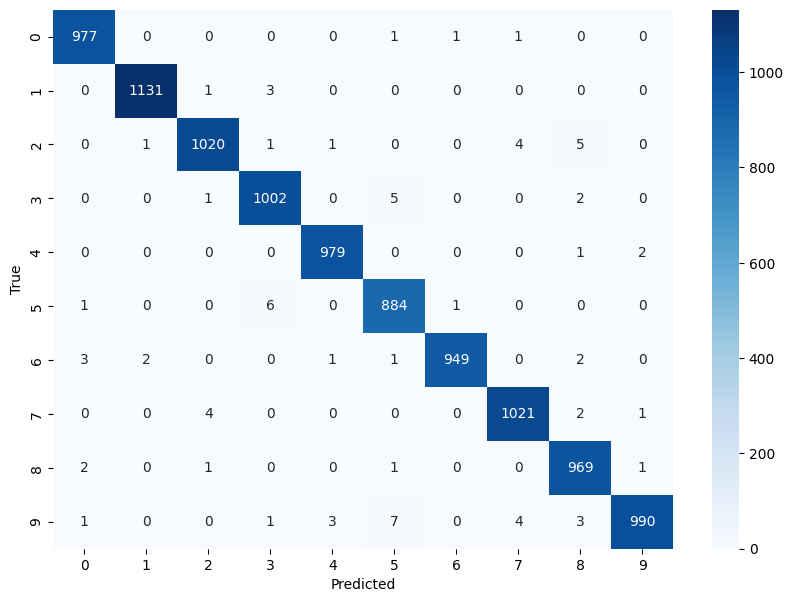

In [12]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_pred = model.predict(test_images)
conf_mat = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(test_pred, axis=1))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

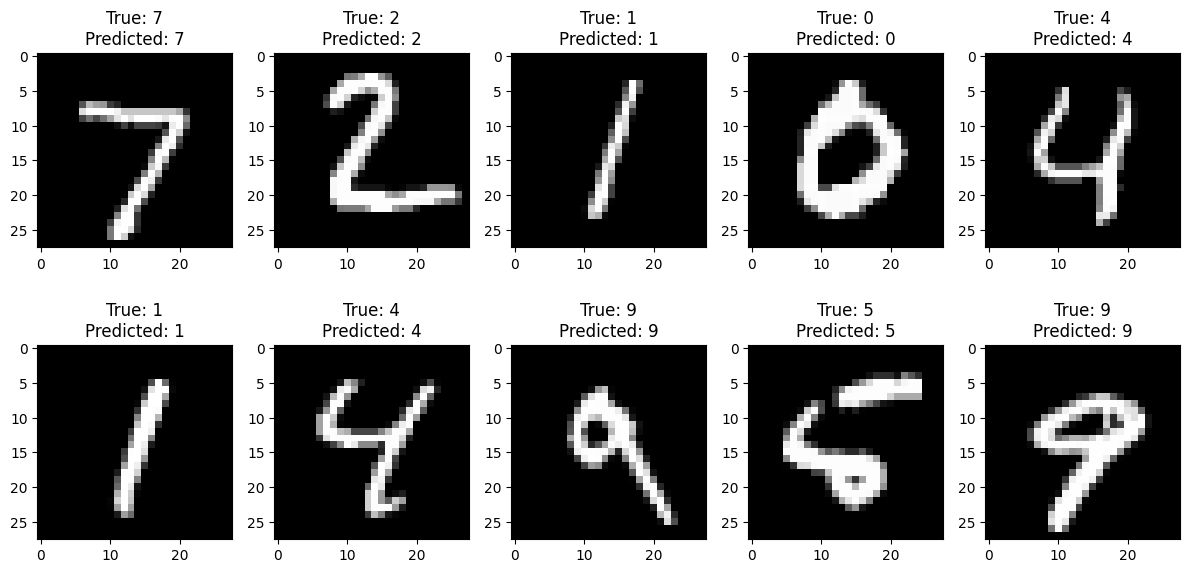

In [14]:
# Prediction visualization
def plot_predictions(images, true_labels, pred_labels):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {true_labels[i]}\nPredicted: {pred_labels[i]}')
    plt.tight_layout()
    plt.show()

test_pred_labels = np.argmax(test_pred, axis=1)
plot_predictions(test_images, np.argmax(test_labels, axis=1), test_pred_labels)

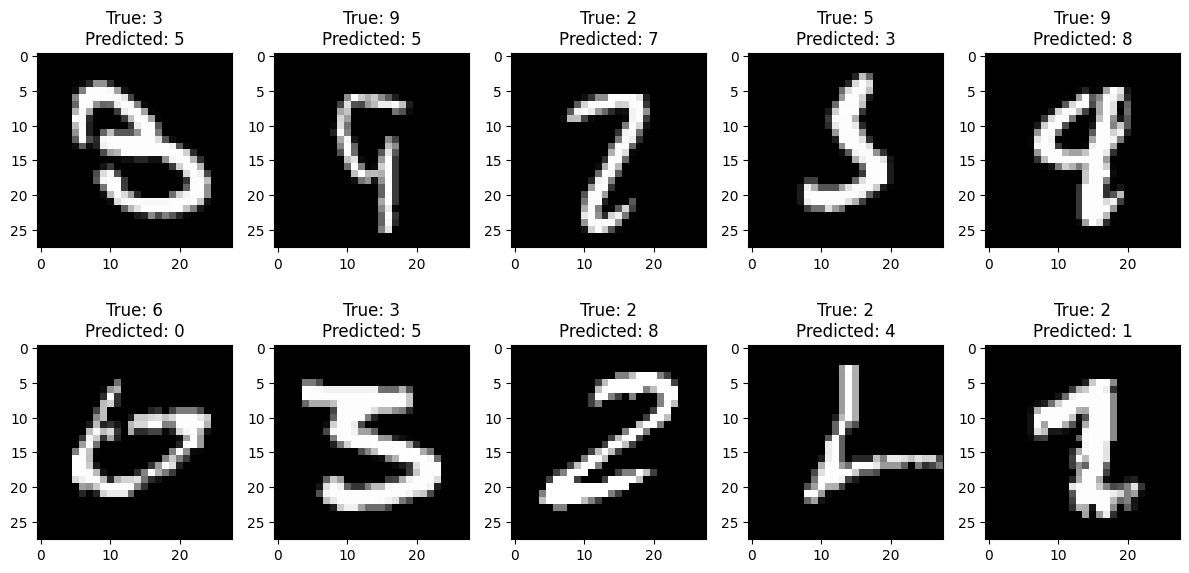

In [15]:
# Misclassifications Visualization
def plot_misclassifications(images, true_labels, pred_labels):
    misclassified_indices = np.where(true_labels != pred_labels)[0]
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'True: {true_labels[idx]}\nPredicted: {pred_labels[idx]}')
    plt.tight_layout()
    plt.show()

plot_misclassifications(test_images, np.argmax(test_labels, axis=1), test_pred_labels)